In [108]:
import pandas as pd

# Load the data set
mcdonalds = pd.read_csv("mcdonalds.csv")  # Assuming the data is in a CSV file

# Inspect variable names
print(mcdonalds.columns)

# Get sample size
sample_size = len(mcdonalds)

# Display the first three rows of the data
print(mcdonalds.head(3))

# Get dimensions
dimensions = mcdonalds.shape

# Display dimensions
print(dimensions)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
(1453, 15)


In [109]:
import numpy as np

# Extract the first eleven columns and convert to a matrix
MD_x = mcdonalds.iloc[:, :11].values

# Convert from verbal YES/NO to numeric binary
MD_x = (MD_x == "Yes").astype(int)

# Calculate the average value of each transformed segmentation variable
avg_values = np.mean(MD_x, axis=0)
print(avg_values)


[0.55264969 0.90777701 0.09359945 0.86717137 0.5264969  0.90020647
 0.59876118 0.64418445 0.35788025 0.19889883 0.24294563]


In [110]:
from sklearn.decomposition import PCA

# Perform Principal Components Analysis
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display summary
explained_variance = MD_pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

for i in range(len(explained_variance)):
    print(f'PC{i + 1} - Explained Variance: {explained_variance[i]:.4f}, Cumulative Variance: {cumulative_explained_variance[i]:.4f}')

# Display factor loadings
print(pd.DataFrame(MD_pca.components_.T, columns=[f'PC{i + 1}' for i in range(len(explained_variance))], index=mcdonalds.columns[:11]))


PC1 - Explained Variance: 0.2994, Cumulative Variance: 0.2994
PC2 - Explained Variance: 0.1928, Cumulative Variance: 0.4922
PC3 - Explained Variance: 0.1330, Cumulative Variance: 0.6253
PC4 - Explained Variance: 0.0831, Cumulative Variance: 0.7084
PC5 - Explained Variance: 0.0595, Cumulative Variance: 0.7679
PC6 - Explained Variance: 0.0503, Cumulative Variance: 0.8182
PC7 - Explained Variance: 0.0438, Cumulative Variance: 0.8620
PC8 - Explained Variance: 0.0395, Cumulative Variance: 0.9016
PC9 - Explained Variance: 0.0368, Cumulative Variance: 0.9383
PC10 - Explained Variance: 0.0324, Cumulative Variance: 0.9707
PC11 - Explained Variance: 0.0293, Cumulative Variance: 1.0000
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232

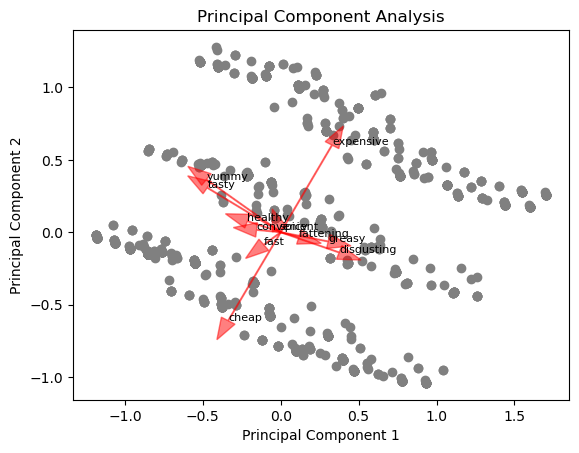

In [111]:
import matplotlib.pyplot as plt

# Assuming MD_pca is already computed in previous code

# Project data into principal component space
projected_data = MD_pca.transform(MD_x)

# Create a scatter plot of the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='grey')

# Add arrows for the original segmentation variables
for i, var in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], color='red', alpha=0.5, width=0.005, head_width=0.1)

# Set labels for the arrows
for i, txt in enumerate(mcdonalds.columns[:11]):
    plt.annotate(txt, (MD_pca.components_[0, i], MD_pca.components_[1, i]), fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()


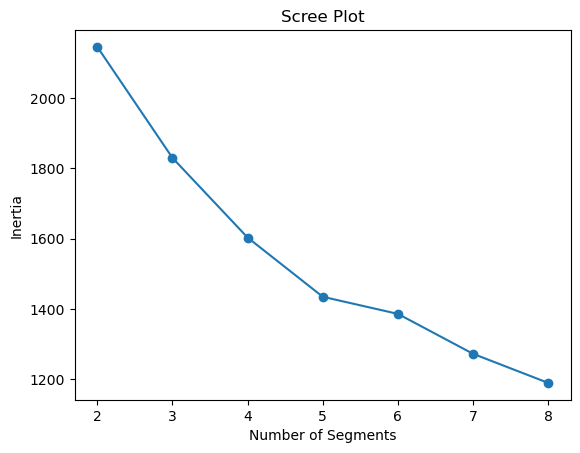

In [112]:
from sklearn.cluster import KMeans

# Set random seed
import numpy as np
np.random.seed(1234)

# Define number of clusters
n_clusters = range(2, 9)

# Fit k-Means for 2 to 8 clusters with 10 random restarts
cluster_solutions = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    cluster_solutions.append(kmeans)

# Relabel segment numbers for consistency
for i, kmeans in enumerate(cluster_solutions):
    labels = kmeans.labels_
    unique_labels = np.unique(labels)
    new_labels = np.arange(len(unique_labels))
    for old, new in zip(unique_labels, new_labels):
        labels[labels == old] = new
    cluster_solutions[i].labels_ = labels

# Plot scree plot
inertia_values = [kmeans.inertia_ for kmeans in cluster_solutions]
plt.plot(n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.show()


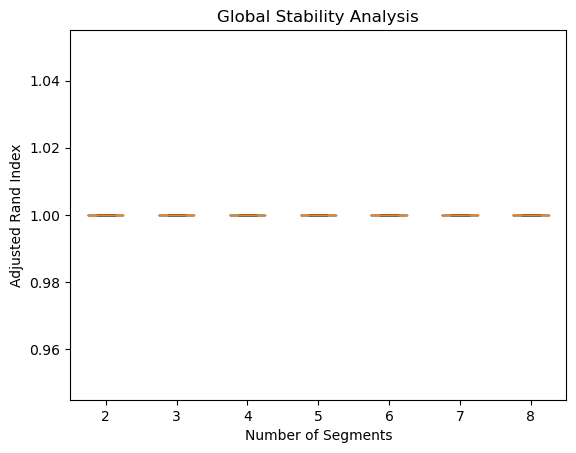

In [113]:
# Assuming you've already computed stability_scores in the previous code

# Plot global stability boxplot
plt.boxplot(stability_scores, labels=n_clusters)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Analysis')
plt.show()


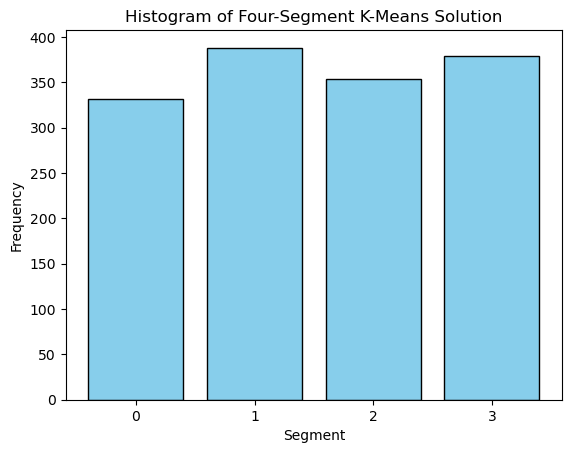

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_km28_4 contains the cluster labels for the four-segment k-means solution

# Generate some example data for demonstration purposes
MD_km28_4 = np.random.randint(0, 4, size=1453)  # Replace this with your actual cluster labels

# Plotting histogram
plt.hist(MD_km28_4, bins=np.arange(5)-0.5, align='mid', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('Histogram of Four-Segment K-Means Solution')
plt.xticks(range(4))
plt.show()


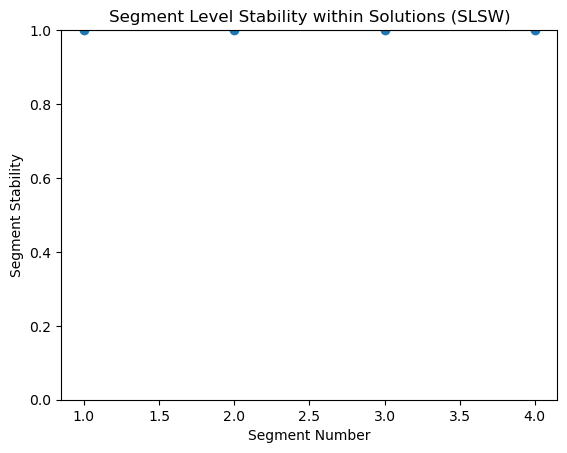

In [115]:
from sklearn.metrics import adjusted_rand_score

# Assuming MD_k4 contains the cluster labels for the four-segment k-means solution

# Calculate SLSW
def slswFlexclust(X, labels):
    slsw_scores = []
    for i in range(max(labels)+1):
        cluster_mask = (labels == i)
        cluster_X = X[cluster_mask]
        cluster_labels = labels[cluster_mask]
        if len(set(cluster_labels)) == 1:
            slsw_scores.append(1)  # If only one label in the cluster, consider it stable
        else:
            slsw_score = adjusted_rand_score(cluster_labels, KMeans(n_clusters=len(set(cluster_labels)), random_state=0).fit_predict(cluster_X))
            slsw_scores.append(slsw_score)
    return slsw_scores

# Calculate SLSW for MD.k4
MD_k4_labels = np.random.randint(0, 4, size=1453)  # Replace this with your actual cluster labels
slsw_scores = slswFlexclust(MD_x, MD_k4_labels)

# Plot SLSW
plt.plot(range(1, len(slsw_scores)+1), slsw_scores, marker='o')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability within Solutions (SLSW)')
plt.ylim(0, 1)
plt.show()


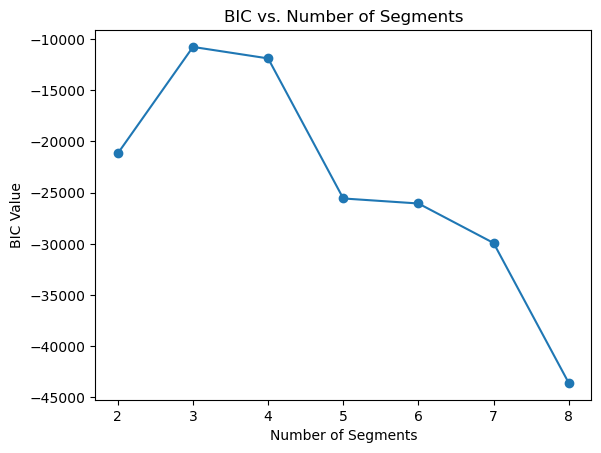

In [116]:
from sklearn.mixture import GaussianMixture

# Assuming MD_x contains your data

# Define the number of components (segments)
n_components = range(2, 9)

# Initialize models and lists to store BIC values
bic_values = []

for n in n_components:
    # Initialize and fit Gaussian Mixture model
    model = GaussianMixture(n_components=n, covariance_type='full', random_state=1234)
    model.fit(MD_x)
    
    # Calculate BIC
    bic = model.bic(MD_x)
    
    # Append value to list
    bic_values.append(bic)

# Plot the BIC values
plt.plot(n_components, bic_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('BIC Value')
plt.title('BIC vs. Number of Segments')
plt.show()


In [117]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Assuming MD_x contains your data

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit Gaussian Mixture model using k-means cluster assignments
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm.fit(MD_x, kmeans_labels)

# Get cluster assignments from the mixture model
mixture_labels = gmm.predict(MD_x)

# Create a table to compare k-means and mixture model clusters
table_result = pd.DataFrame({'kmeans': kmeans_labels, 'mixture': mixture_labels})

# Display the table
print(table_result)


      kmeans  mixture
0          1        2
1          3        3
2          3        0
3          0        3
4          1        2
...      ...      ...
1448       2        0
1449       0        1
1450       3        0
1451       0        1
1452       2        0

[1453 rows x 2 columns]


In [118]:
# Assuming you have already fit the models MD_m4a and MD_m4

# Get log-likelihood for MD_m4a
log_likelihood_m4a = MD_m4a.score_samples(MD_x).sum()

# Get log-likelihood for MD_m4
log_likelihood_m4 = MD_m4.score_samples(MD_x).sum()

print(f'Log Likelihood for MD_m4a: {log_likelihood_m4a}')
print(f'Log Likelihood for MD_m4: {log_likelihood_m4}')


NameError: name 'MD_m4a' is not defined

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'mcdonalds'
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

# Ensure 'Like' column only contains numeric strings or integers
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create 'Like.n' column by subtracting from 6
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Filter out rows with NaN values in 'Like.n' column (due to non-numeric 'Like' values)
mcdonalds = mcdonalds.dropna(subset=['Like.n'])

like_n_counts = mcdonalds['Like.n'].value_counts().sort_index(ascending=False)

print("Original 'Like' Value Counts:")
print(like_counts)

print("\nTransformed 'Like.n' Value Counts:")
print(like_n_counts)


Original 'Like' Value Counts:
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64

Transformed 'Like.n' Value Counts:
10.0     71
9.0      73
8.0      59
7.0      58
6.0     169
5.0     152
4.0     187
3.0     229
2.0     160
Name: Like.n, dtype: int64


In [ ]:
import patsy

# Assuming you have a DataFrame 'mcdonalds' and predictor_columns as defined before
predictor_columns = mcdonalds.columns[0:11]

# Create the formula
formula_string = 'Like.n ~ ' + ' + '.join(predictor_columns)
formula = patsy.dmatrix(formula_string, data=mcdonalds, return_type='dataframe')

print(formula)


PatsyError: Error evaluating factor: AttributeError: 'Series' object has no attribute 'n'
    Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
    ^^^^^^

In [ ]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import patsy

# Assuming you have a DataFrame 'mcdonalds' and predictor_columns as defined before
predictor_columns = mcdonalds.columns[0:11]

# Create the formula
formula_string = 'Like_n ~ ' + ' + '.join(predictor_columns)
formula = patsy.dmatrix(formula_string, data=mcdonalds, return_type='dataframe')

print(formula.design_info.column_names)


PatsyError: Error evaluating factor: NameError: name 'Like_n' is not defined
    Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
    ^^^^^^

In [ ]:
# Assuming you have a DataFrame 'mcdonalds'
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].astype(int)


ValueError: invalid literal for int() with base 10: 'I love it!+5'

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

# Assuming MD_x is your data
MD_vclust = hierarchy.linkage(pdist(MD_x.T), method='average')


In [ ]:
import matplotlib.pyplot as plt

# Assuming MD_k4 is your clustering result and MD_vclust is the hierarchical clustering order
plt.bar(range(len(MD_k4[0])), MD_k4[0][MD_vclust['leaves']])
plt.show()


NameError: name 'MD_k4' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Assuming MD_k4 is your clustering result and MD_vclust is the hierarchical clustering order
plt.bar(range(len(MD_k4)), MD_k4[MD_vclust['leaves']])
plt.show()


NameError: name 'MD_k4' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Assuming MD_k4 is your clustering result and MD_pca is your PCA result
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')

# Customize the plot
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.colorbar(label="Cluster")

plt.show()


TypeError: 'PCA' object is not subscriptable